# 0. Introduction
**Before we start:** this environment that allows us to enter both text and run codes interactively, is called ***[notebook](https://jupyter.org/)***).

There are two types of cells: *Text* and *Code*. You can add your own cells. You can also edit the texts by double-clicking on them. It follows the [markup rules](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

In order to execute (run) a cell, you can use one of the following ways:

0. `Shift + Enter` : executes a cell and goes to the next one.
1. `Ctrl + Enter` : executes a block but stays at the same block. This is equivalent to clicking on the *run* butten to the left of the cell, which appears when you hover the mouse over the `[ ]` icon.
2. Use the `Runtime` tab (at the top of the page), which gives you more options as well.

In [ ]:
# import libraries we will be using
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
from sklearn import datasets

In this and subsequent labs, we will be using the libraries imported above among others.

You are strongly encouraged to refer to the API's or each library and familiarize yourselves with the available classes and methods.

# 1. Bayes Rule
Bayes Rule is used a lot for inference.
\begin{equation}
P(\textrm{A }
| \textrm{ B}) =
\frac{P(\textrm{B }
| \textrm{ A})
\times
P(\textrm{A})}{P(\textrm{B})}
\end{equation}

In [ ]:
def bayes_rule(likelihood: float, prior_a:float, prior_b: float) -> float:
  """
  Bayes rule calculation.
  P(A|B) = (P(B|A) * P(A)) / P(B)

  Given the likelihood i.e. P(B|A), the prior probability of A (P(A)) and the
  prior probability of B (P(B)), the method calculates the posterior probability
  P(A|B).
  Args:
    likelihood: the likelihood, 0 <= P(B|A) <= 1
    prior_a: the prior probability of A, 0 <= P(A) <= 1
    prior_b: the  prior probability of B, 0 <= P(B) <= 1
  Returns:
    The posterior probability P(A|B)
  """
  assert likelihood >= 0 and likelihood <= 1, ("Probability should be between 0 and 1")
  assert prior_a >= 0 and prior_a <= 1, ("Probability should be between 0 and 1")
  assert prior_b >= 0 and prior_b <= 1, ("Probability should be between 0 and 1")

  posterior = likelihood * prior_a /  prior_b
  return posterior

##1.1 Revisit the excercise from the lecture notes!


A bank asks a machine learning engineer to build a system to decide whether to approve or not, loan applications (0.1% of all loan applications will not be repaid).

The bank installs a system that recommends whether the loan should be approved or not.

The system, is such that it will correctly identify loans that will not be repaid, 99% of the time.

Similarly, the system will correctly identify loans that will be repaid 99% of the time.

What is the probability that a loan will not be repaid given that the system has identified it as such?

In [ ]:
p_nr = 0.001 # 0.1% of all loan applications will not be repaid   P(NR)
p_r = 0.999 # 1-p_nr  P(R)

p_neg_nr = 0.99 # correctly identify loans that will not be repaid, 99% of the time   P(Neg|NR)
p_pos_nr = 0.01 # 1-p_neg_nr    P(Pos|NR)

p_pos_r = 0.99 # correctly identify loans that will be repaid 99% of the time   P(Pos|R)
p_neg_r = 0.01 # 1-p_pos_r    P(Neg|R)

In [ ]:
p_neg = p_neg_r * p_r + p_neg_nr * p_nr
p_nr_neg = bayes_rule(likelihood=p_neg_nr, prior_a=p_nr, prior_b=p_neg)
print(p_nr_neg)

0.09016393442622951


## 1.2 Ex. 1: The Sally Clark Case (aka prosecutor's fallacy)

Sally Clark, a lawyer who lost her first son at 11 weeks and her second at 8 weeks, was convicted in 1999.


The chance of one random infant dying from SIDS was about **1 in 1,300** during this period in Britain.

The estimated odds of a second SIDS death in the same family was much larger, perhaps **1 in 100**, because family members can share a common environmental or genetic propensity for SIDS.

About **30 children out of 650,000** annual births in England, Scotland, and Wales were known to have been murdered by their mothers.

The number of double murders must be much lower, estimated as **10 times less likely**.


What is the probability of SIDS for both children?

What is the probability a random pair of siblings dies suddenly and expectedly but not from SIDS?

What is the probability that the cause of death was SIDS, given their unexplained deaths?

What scenario is more likely?

(Hint: Probability of death given SIDS is 1)

### 1.  Knowed Probability

P(first one random infant dying from SIDS) = 1/1300

P(second one random infant dying from SIDS) = 1/100

P(A child murdered by their mothers) = 3/65000

P(double murdered by their mothers) = 3/650000

P(Died | SIDS) = 1
### 2.  ANS

[1].  P(SIDS for both children) =  P(first one random infant dying from SIDS) * P(second one random infant dying from SIDS) = 1/1300 * 1/100 = 1/130000

[2].  P(a random pair of siblings dies but not from SIDS) = P(not SIDS) * P(double murdered by their mothers) = (129999/130000) * (3/650000) = 389997/84500000000

[3].  P(SIDS | Died) = P(Died | SIDS) * P(SIDS) / P(Died)

P(Died) = P(SIDS for both children) + P(a random pair of siblings dies but not from SIDS)


In [ ]:
### your calculations here ###

## 1.3 Ex. 2
Company A supplies 40% of the computers sold and is late 5% of the time.

Company B supplies 30% of the computers sold and is late 3% of the time.

Company C supplies another 30% and is late 2.5% of the time.

A computer arrives late - what is the probability that it came from Company A?


In [ ]:
### your calculations here ###
"""
QUESTION P(A|late)? = P(late|A) * P(A) / P(late)
P(A) = 0.4 computer supplied form company A ; P(late|A) = 0.005
p(B) = 0.3 computer supplied form company B ; P(late|B) = 0.003
P(C) = 0.3 computer supplied form company C ; P(late|C) = 0.0025

P(late) = P(late|A) * P(A) + P(late|B) * P(B) + P(late|C) * P(C)

"""
P_A, P_B, P_C = 0.4, 0.3, 0.3
P_LATE_A, P_LATE_B, P_LATE_C = 0.005, 0.003, 0.0025

P_LATE = P_LATE_A * P_A + P_LATE_B * P_B + P_LATE_C * P_C
P_A_LATE = P_LATE_A * P_A / P_LATE

print(P_A_LATE)

0.5479452054794521


# 2. Gaussian Distribution
aka the ‘normal distribution’, with probability density function (pdf):
\begin{equation}
f(x) = \frac{1}{\sigma\sqrt{2\pi}}
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)
\end{equation}
where μ is the mean and σ is the standard deviation.

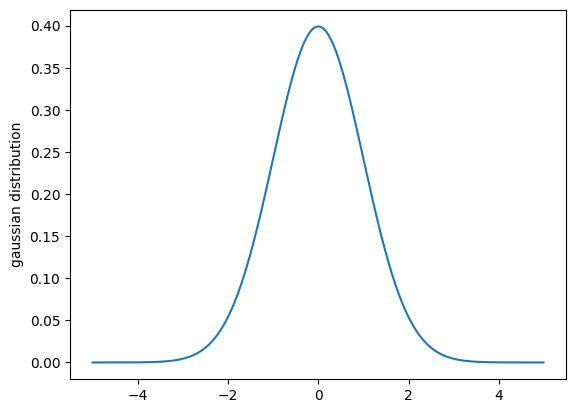

In [ ]:
mean = 0; std = 1; variance = np.square(std)
x = np.arange(-5,5,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

Plot a few distributions with different μ and σ.

What do you observe?

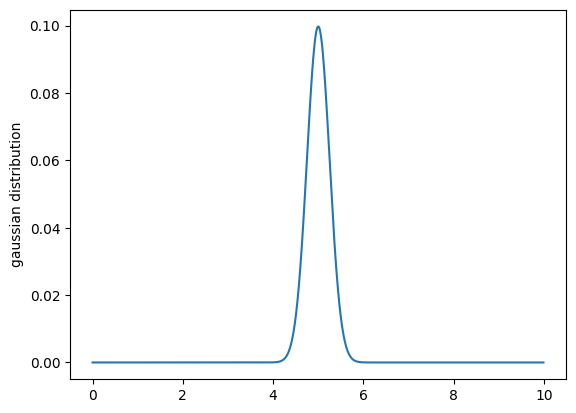

In [ ]:
### your code here ###
mean = 5; std = 4; variance = np.square(std)
x = np.arange(0, 10, .01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

# 3. Independent Random Variables
The covariance of two RVs X and Y is:
\begin{equation}
  \textrm{Cov}(X,Y)=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}
\end{equation}

and Pearson's Correlation Coefficient is:

\begin{equation}
  \textrm{PCC}(X,Y) = \frac{\textrm{Cov}(X,Y)}{σ_xσ_y}
\end{equation}

Write two methods, one for each formula

In [ ]:
def COV(x, y):
  cov = 0
  ### your code here
  return cov

def PCC(x, y):
  pcc = 0
  ### your code here
  return pcc

Below are annual data of people who drowned by falling into a pool and films Nicolas Cage appeared in.

Now using matplotlib, plot the data below as timeseries (hint: check matplotlib [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html))

In [ ]:
year = np.arange(1999, 2010)
cage_films = np.array([2, 2, 2, 3, 1, 1, 2, 3, 4, 1, 4])
drownings = np.array([109, 102, 102, 98, 85, 95, 96, 98, 123, 94, 102])

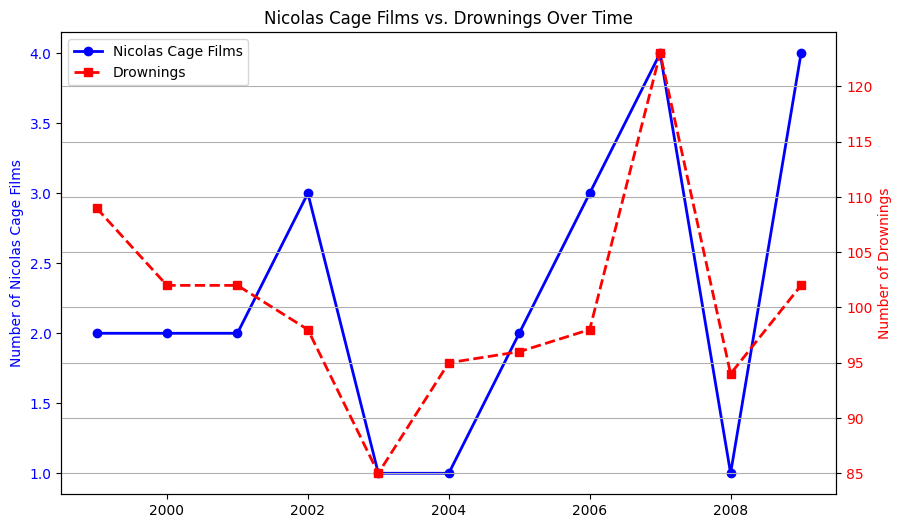

In [ ]:
### your code here
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Nicolas Cage films on the first y-axis
ax1.plot(year, cage_films, color='b', marker='o', label='Nicolas Cage Films', linestyle='-', linewidth=2)

# Set the y-axis label
ax1.set_ylabel('Number of Nicolas Cage Films', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right for drownings
ax2 = ax1.twinx()
ax2.plot(year, drownings, color='r', marker='s', label='Drownings', linestyle='--', linewidth=2)

# Set the y-axis label for the second y-axis
ax2.set_ylabel('Number of Drownings', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the x-axis label
plt.xlabel('Year')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Title
plt.title('Nicolas Cage Films vs. Drownings Over Time')

# Show the plot
plt.grid()
plt.show()

Using the methods for COV and PCC, calculate the correlation coefficient between annual drownings in pools and Nic Cage films. Does it look like a strong correlation? What conclusion can be drawn for correlation vs causation in Independent Random Variables?

In [ ]:
### your code here
# Calculate the means
mean_cage_films = np.mean(cage_films)
mean_drownings = np.mean(drownings)

# Calculate the covariance
covariance = np.sum((cage_films - mean_cage_films) * (drownings - mean_drownings)) / (len(cage_films) - 1)

# Calculate the standard deviations
std_cage_films = np.std(cage_films, ddof=1)
std_drownings = np.std(drownings, ddof=1)

# Calculate the Pearson Correlation Coefficient (PCC)
pcc = covariance / (std_cage_films * std_drownings)

print("Covariance (COV):", covariance)
print("Pearson Correlation Coefficient (PCC):", pcc)

Covariance (COV): 7.090909090909091
Pearson Correlation Coefficient (PCC): 0.6660043486679171


Modify the COV and PCC methods to handle n-dimensional data

In [ ]:
def COV(x: np.array, y: np.array) -> np.array:
  ### your code here
  return

def PCC(x: np.array, y: np.array) -> np.array:
  ### your code here
  return

For a more complex example, we will use the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) from sklearn

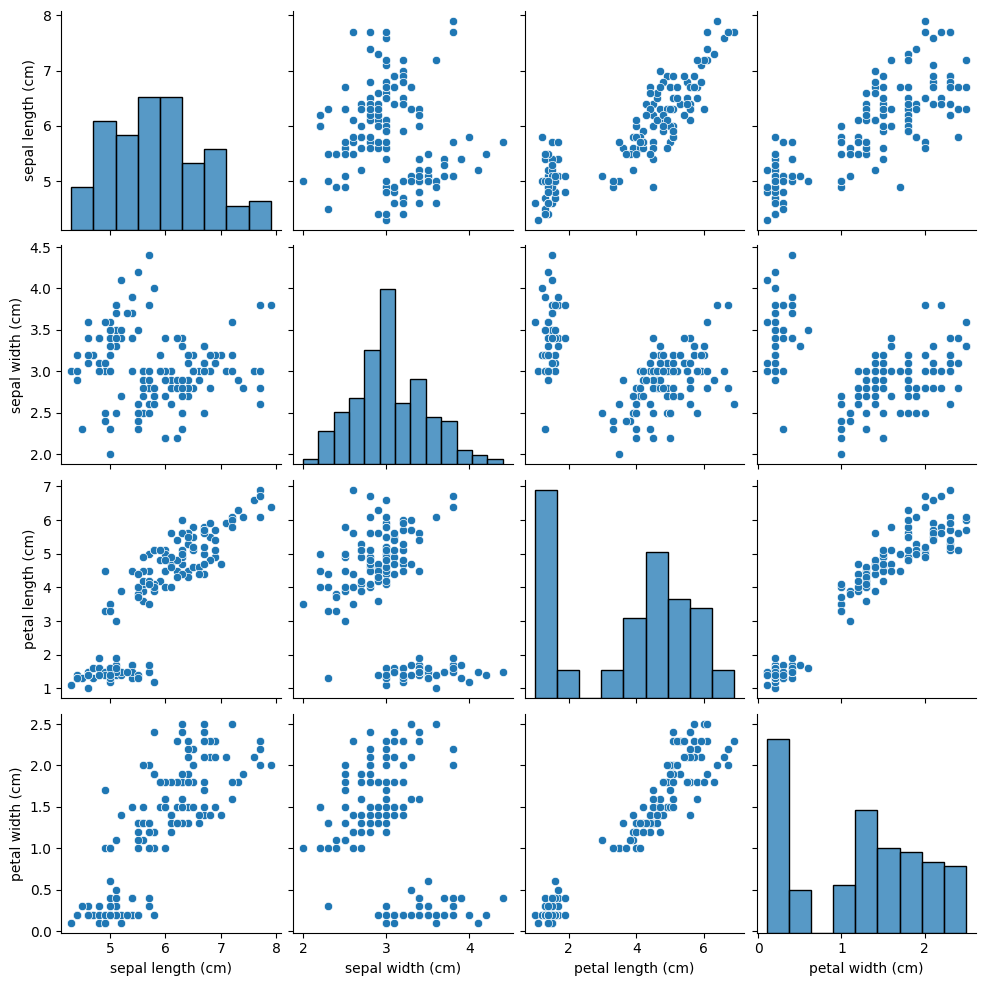

In [ ]:
iris_db = datasets.load_iris(as_frame=True)
sn.pairplot(iris_db.data)

Using the COV and PCC methods written above, write your own code to produce the covariance and correlation matrices of the data features and seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) method to visualize the output (hint: the matrix will have shape  $num\_feats × num\_feats$ )

In [ ]:
### your code here

Let's focus on `petal length` and `petal width.`

Using `numpy` make a 2D histogram for the two features, with `8x8` bins and visualize it using `matplotlib`.

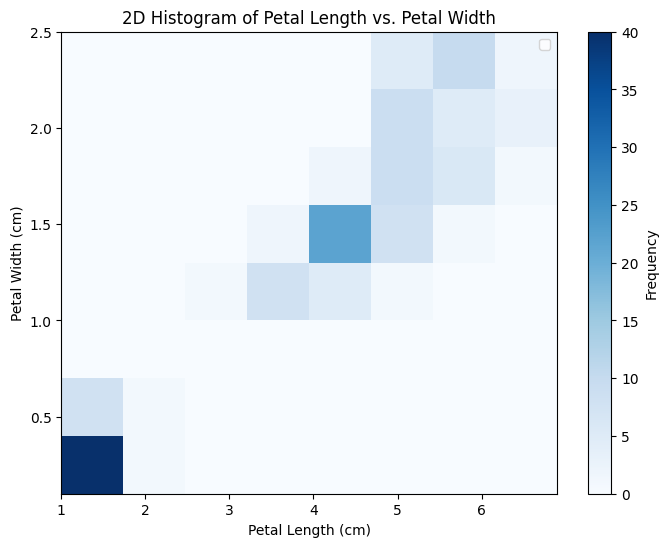

In [ ]:
data = iris_db.data[['petal length (cm)', 'petal width (cm)']]
### your code here
# Extract the two columns as NumPy arrays
petal_length = data['petal length (cm)'].to_numpy()
petal_width = data['petal width (cm)'].to_numpy()

# Define the number of bins
num_bins = 8

# Create a 2D histogram using NumPy
hist, x_edges, y_edges = np.histogram2d(petal_length, petal_width, bins=num_bins)

# Create a meshgrid for the histogram bins
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2
x, y = np.meshgrid(x_centers, y_centers)

# Create the histogram plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(x, y, hist.T, cmap='Blues')
plt.colorbar(label='Frequency')

# Set labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('2D Histogram of Petal Length vs. Petal Width')

# Add a legend
plt.legend(['Frequency'])
plt.show()

Using the concepts learnt in the lectures and the histogram generated, find:


*   The Joint probability matrix
*   The conditional probability matrix
*   The marginal probabilities of the two features (2 vectors of size 8)
*   Fit a Gaussian to each dimension and plot it along with the marginal probability vectors





In [ ]:
### your code here


Are petal length and width independent? Are they correlated?